In [1]:
import fasttext, gensim, string, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim

from gensim.models import KeyedVectors
from sklearn import metrics
from sklearn.metrics import hamming_loss, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
pip show gensim fasttext sklearn

Name: gensim
Version: 4.3.2
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages
Requires: numpy, scipy, smart-open
Required-by: 
---
Name: fasttext
Version: 0.9.2
Summary: fasttext Python bindings
Home-page: https://github.com/facebookresearch/fastText
Author: Onur Celebi
Author-email: celebio@fb.com
License: MIT
Location: /Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages
Requires: numpy, pybind11, setuptools
Required-by: 
---
Name: sklearn
Version: 0.0.post1
Summary: deprecated sklearn package, use scikit-learn instead
Home-page: UNKNOWN
Author: 
Author-email: 
License: UNKNOWN
Location: /Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
def pipe_try(xx_test, yy_test, model):
    print('========================== {} ==========================\n'.format(model))
    print("\t \t \t\t \t------------------")
    print("\t \t \t \t \tF1 Score: ", round(f1_score(yy_test, model.predict(xx_test), average='macro')*100,3),"%")
    print("\t \t \t\t \tAccuracy: ", round(metrics.accuracy_score(yy_test, model.predict(xx_test))*100,3),"%")
    print("    \t \t \t \t       Hamming Loss: ", round(hamming_loss(yy_test, model.predict(xx_test)), 3))
    #print("    \t \t \t \t       ROC_AUC Score: ", round(roc_auc_score(yy_test, model.predict(xx_test))*100, 3), '%')
    print("    \t \t \t \t   Weighted F1 Score: ",round(f1_score(yy_test, model.predict(xx_test), average='weighted')*100,3),"%")
    print("    \t \t \t \t   ---------------------------\n")
    print('================================= Pipeline Specifications ==================================')
    print(model)

In [3]:
embedding_file = '/Users/suhas.kamuni/Downloads/crawl-300d-2M.vec'
df = pd.read_excel('/Users/suhas.kamuni/Downloads/Merged_Training_Set.xlsx')
df.drop(['Platform.1'], axis = 1)

,Review ID,Reviews Content,Converted English,Rating,Start Date,Version,Platform,Source,Month,Predicted Team
0,158994127,Keine vernünftige Struktur wie bei Web Version...,Not a reasonable structure as with web version...,1,21.10.2022,NaN,Android,EasyFeedback,September,People/Homepage
1,158999921,Ich finde vorher war übersicht besser.,I think before was overview better.,2,21.10.2022,NaN,Android,EasyFeedback,September,Design System
2,159009543,Teilweise mühsame Navigation,Partly tedious navigation,3,22.10.2022,NaN,Android,EasyFeedback,September,General
3,159010950,Unpraktische Bedienung,Impractical operation,2,22.10.2022,NaN,Android,EasyFeedback,September,General
4,159033855,"Mich stört, dass laufend irgendwelche Besucher...",It bothers me that some visitors can constantl...,2,22.10.2022,NaN,Android,EasyFeedback,September,Profile
...,...,...,...,...,...,...,...,...,...,...
1861,180738858,Gesendete Kontaktanfragen sind über die App ni...,Sent contact requests cannot be accessed via t...,2,2023-09-11 00:00:00,NaN,iOS,EasyFeedback,September,People/Homepage
1862,182164129,Freundschaftsanfragen werden in der App bei mi...,Friendship requests are not displayed in the app.,2,2023-09-27 00:00:00,NaN,iOS,EasyFeedback,September,Premium
1863,181028450,Finde es in der App sehr schwer meine Kontakte...,I find it very difficult to find my contacts/n...,3,2023-09-14 00:00:00,NaN,Android,EasyFeedback,September,Profile
1864,182097301,Dazernd unpasende und bereits abgelehnte Konta...,Dazern unsuitable and already rejected contact...,2,2023-09-26 00:00:00,NaN,Android,EasyFeedback,September,Reference to Groups


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

LR_502 = LogisticRegression(C=502, solver='liblinear', class_weight='balanced')
vectorizer_tfidf = TfidfVectorizer(lowercase = True, max_features = 500)

pipe = Pipeline([
            ("Vectorizer_tfidf", vectorizer_tfidf),
            #("Scaler", Scaler),
            ("",LR_502)
        ])

In [5]:
# Load vectors directly using Gensim
model = KeyedVectors.load_word2vec_format(embedding_file)

In [6]:
def generate_sentence_vector(sentence):
    words = sentence.split()
    sentence_vector = np.mean([model[word] for word in words if word in model], axis=0)
    return sentence_vector if isinstance(sentence_vector, np.ndarray) else np.zeros((model.vector_size,))

# Generate FastText embeddings for each sentence
sentences_data = df['Converted English']

In [7]:
# Calculate the sentence vector by averaging the vectors of the words in the sentence
X = np.array([generate_sentence_vector(sentence) for sentence in sentences_data])
y = df['Predicted Team']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

/Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
pipe.fit(df['Converted English'], df['Predicted Team'])

Pipeline(steps=[('Vectorizer_tfidf', TfidfVectorizer(max_features=500)),
                ('',
                 LogisticRegression(C=502, class_weight='balanced',
                                    solver='liblinear'))])

In [8]:
X_train.shape, y_train.shape

((1492, 300), (1492,))

In [9]:
# Initialize a RandomForest
rf_glove = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_glove.fit(X_train, y_train)

# Predict on test data
y_pred = rf_glove.predict(X_test)

In [10]:
# Print performance details
print(metrics.classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

                 Ads       1.00      0.16      0.27        19
                CPAY       0.50      0.14      0.22         7
Content Architecture       0.00      0.00      0.00        16
       Design System       0.00      0.00      0.00        22
             General       0.43      0.99      0.59       137
            Insights       0.00      0.00      0.00        19
                Jobs       0.56      0.25      0.34        20
 LinkedIn comparison       1.00      0.43      0.60        14
           Messenger       1.00      0.08      0.14        13
        Notification       1.00      0.17      0.29        12
     People/Homepage       0.50      0.29      0.36        35
             Premium       0.57      0.22      0.32        18
             Profile       0.00      0.00      0.00        16
 Reference to Groups       0.33      0.07      0.12        14
              Upsell       0.00      0.00      0.00        12

      

/Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhas.kamuni/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [11]:
pipe_try(X_test, y_test, rf_glove)

========================== RandomForestClassifier() ==========================

	 	 		 	------------------
	 	 	 	 	F1 Score:  21.762 %
	 	 		 	Accuracy:  44.92 %
    	 	 	 	       Hamming Loss:  0.551
    	 	 	 	   Weighted F1 Score:  34.473 %
    	 	 	 	   ---------------------------

================================= Pipeline Specifications ==================================
RandomForestClassifier()


In [12]:
LR_glove = LR_502 = LogisticRegression(C=502, solver='liblinear')
LR_glove.fit(X_train, y_train)
pipe_try(X_test, y_test, LR_glove)

========================== LogisticRegression(C=502, solver='liblinear') ==========================

	 	 		 	------------------
	 	 	 	 	F1 Score:  48.148 %
	 	 		 	Accuracy:  52.406 %
    	 	 	 	       Hamming Loss:  0.476
    	 	 	 	   Weighted F1 Score:  53.018 %
    	 	 	 	   ---------------------------

================================= Pipeline Specifications ==================================
LogisticRegression(C=502, solver='liblinear')


In [13]:
print(metrics.classification_report(y_test, LR_glove.predict(X_test)))

                      precision    recall  f1-score   support

                 Ads       0.25      0.32      0.28        19
                CPAY       0.17      0.14      0.15         7
Content Architecture       0.50      0.50      0.50        16
       Design System       0.33      0.32      0.33        22
             General       0.62      0.59      0.60       137
            Insights       0.59      0.53      0.56        19
                Jobs       0.44      0.55      0.49        20
 LinkedIn comparison       0.67      0.71      0.69        14
           Messenger       0.67      0.62      0.64        13
        Notification       0.73      0.67      0.70        12
     People/Homepage       0.65      0.57      0.61        35
             Premium       0.32      0.50      0.39        18
             Profile       0.53      0.56      0.55        16
 Reference to Groups       1.00      0.50      0.67        14
              Upsell       0.08      0.08      0.08        12

      

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'Ads'),
  Text(1.5, 0, 'CPAY'),
  Text(2.5, 0, 'Content Architecture'),
  Text(3.5, 0, 'Design System'),
  Text(4.5, 0, 'General'),
  Text(5.5, 0, 'Insights'),
  Text(6.5, 0, 'Jobs'),
  Text(7.5, 0, 'LinkedIn comparison'),
  Text(8.5, 0, 'Messenger'),
  Text(9.5, 0, 'Notification'),
  Text(10.5, 0, 'People/Homepage'),
  Text(11.5, 0, 'Premium'),
  Text(12.5, 0, 'Profile'),
  Text(13.5, 0, 'Reference to Groups'),
  Text(14.5, 0, 'Upsell')])

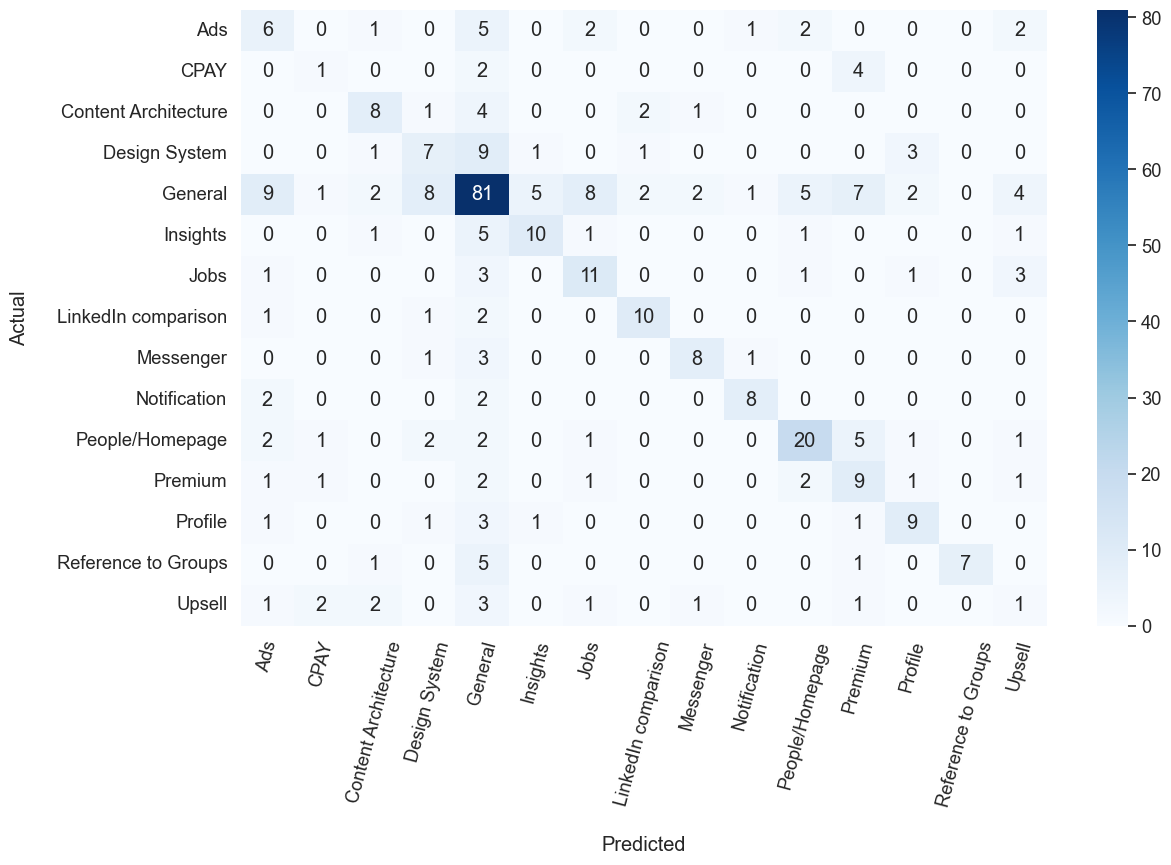

In [24]:
import seaborn as sns
sns.set(font_scale=1.2)
cm = confusion_matrix(y_test, LR_glove.predict(X_test))
fig, ax = plt.subplots(figsize=(13,8))

sns.heatmap(cm, 
            annot=True, 
            cmap="Blues", 
            fmt='d',
            xticklabels = pipe[-1].classes_,
            yticklabels = pipe[-1].classes_,
            )

plt.ylabel('Actual\n')
plt.xlabel('\nPredicted')
plt.xticks(rotation = 75)
#plt.title("Confusion Matrix\n", size = 17)